# Languages

## About

JSON-LD fully support the identification of the language types.

Properties such as label, description, keyword etc can be 
extended in the context with a container language attribute notiation.

This will allow the use of standard language codes (fr, es, en, de, etc) to
be used when describing these properties.   A list of codes can be seen
at the [Online Browsing Platform (OBP)](https://www.iso.org/obp/ui/#search and)
and [Popular standards ISO 3166 Country Codes](https://www.iso.org/iso-3166-country-codes.html).
You should use the 2-letter codes as demonstrated below.  


```{literalinclude} ./graphs/language.json
:linenos:
```

Fontconfig error: "/etc/fonts/conf.d/30-0-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/60-open-sans.conf", line 1: Extra content at the end of the document

Fontconfig error: "/etc/fonts/conf.d/62-google-crosextra-caladea-fonts.conf", line 1: Extra content at the end of the document



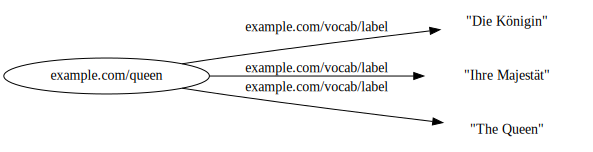

In [1]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils

with open("./graphs/language.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

In graph space the resulting triples from the above are:

```
<http://example.com/queen> <http://example.com/vocab/label> "Die Königin"@de .
<http://example.com/queen> <http://example.com/vocab/label> "Ihre Majestät"@de .
<http://example.com/queen> <http://example.com/vocab/label> "The Queen"@en .
```

with language encoding attributes in place.  These can be used in
searching and result filters.

Note, this can cause issues in query space since the concept of

```
"Semua orang dilahirkan merdeka dan mempunyai martabat dan hak-hak yang sama. 
Mereka dikaruniai akal dan hati nurani dan hendaknya bergaul satu 
sama lain dalam semangat persaudaraan."
```

and
 
 ```
 "Semua orang dilahirkan merdeka dan mempunyai martabat 
 dan hak-hak yang sama. Mereka dikaruniai akal dan hati nurani 
 dan hendaknya bergaul satu sama lain dalam semangat persaudaraan."@id
 ``` 
 
are different and so care must be taken the creation of the SPARQL 
queries not to accidentally imposed implicate filters through the use 
of language types.